In [30]:
import numpy as np
import elementaries as el
import ansatzes as ans
import optimization as opt
import hamiltonians as ham
from scipy.optimize import minimize
import random

In [97]:
z_generators=ham.single_qubit_paulis(3)
z_magnitude=1
xx_generators=ham.two_qubit_strings(1,1)
xx_disorder_strength=0.1/el.number_of_qubits

hamiltonian_z=ham.constant_subhamiltonian(z_magnitude,z_generators)
hamiltonian_xx=ham.random_subhamiltonian(xx_disorder_strength,xx_generators)

hamiltonian=hamiltonian_z+hamiltonian_xx
GS_energy=min(np.linalg.eig(hamiltonian)[0])
GS_state=np.linalg.eig(hamiltonian)[1][1]
GS_state=GS_state/np.linalg.norm(GS_state)

In [98]:
print(np.linalg.eig(hamiltonian)[0])

[ 6.00053598e+00+0.j -6.00053135e+00+0.j  3.98387947e+00+0.j
  4.01446042e+00+0.j  3.99272683e+00+0.j  4.00830036e+00+0.j
  4.00341426e+00+0.j  3.99935799e+00+0.j -4.01701856e+00+0.j
 -3.98614448e+00+0.j -4.00761777e+00+0.j -4.00149608e+00+0.j
 -3.99257220e+00+0.j -3.99728096e+00+0.j  1.97591282e+00+0.j
  2.02291194e+00+0.j  1.98037602e+00+0.j  1.98709029e+00+0.j
  2.01597602e+00+0.j  1.99087279e+00+0.j  2.01112575e+00+0.j
  2.01077214e+00+0.j  2.00870347e+00+0.j  2.00628147e+00+0.j
  1.99354390e+00+0.j  1.99650233e+00+0.j  2.00238537e+00+0.j
  1.99973561e+00+0.j  2.00047615e+00+0.j -2.02466516e+00+0.j
 -1.97741061e+00+0.j -2.01969313e+00+0.j -2.01353840e+00+0.j
 -1.98436831e+00+0.j -2.00929591e+00+0.j -2.00670934e+00+0.j
 -1.98929173e+00+0.j -1.98966527e+00+0.j -1.99161223e+00+0.j
 -1.99395525e+00+0.j -2.00391537e+00+0.j -2.00073143e+00+0.j
 -1.99976007e+00+0.j -1.99805849e+00+0.j  2.49513615e-02+0.j
 -2.59358649e-02+0.j -2.40784664e-02+0.j  2.01093342e-02+0.j
 -1.53167493e-02+0.j -1.

In [2]:
vac=np.zeros(2**el.number_of_qubits)
vac[0]=1
vac+=0.2*np.random.rand(2**el.number_of_qubits)
vac=vac/np.linalg.norm(vac)

print(vac)

[0.99470868 0.04991742 0.08829613 0.01633055]


In [99]:
result2=opt.optimize_fidelity(ans.kQSA(2),GS_state,None)

print(result2.fun, result2.nfev)

-0.7976172268979529 1357


In [102]:
result22=opt.optimize_fidelity((ans.kQSA(2)+ans.kQSA(2)),GS_state,None)

print(result22.fun, result22.nfev)

-0.9999553473647899 6468


In [111]:
result222=opt.optimize_fidelity((ans.kQSA(2)+ans.kQSA(2)+ans.kQSA(2)),GS_state,None)

print(result222.fun, result222.nfev)

-0.9999971878142886 39520


In [103]:
result3=opt.optimize_fidelity(ans.kQSA(3),GS_state,None)

print(result3.fun, result3.nfev)

-0.9999631940747893 1634


In [112]:
result4=opt.optimize_fidelity(ans.kQSA(4),GS_state,None)

print(result4.fun, result4.nfev)

-0.9999984543086051 4002


In [53]:
len(ans.kQSA(2))

21

In [100]:
np.linalg.det(result2.hess_inv)

0.016540925396915828

In [101]:
np.linalg.norm(result2.x)

2.15435109624222

In [79]:
np.linalg.det(result22.hess_inv)

33.24016934145746

In [80]:
np.linalg.norm(result22.x)

2.282725218990763

In [113]:
np.linalg.det(result222.hess_inv)

2.1871006989053017e+26

In [114]:
np.linalg.norm(result222.x)

2.1501255330808937

In [81]:
np.linalg.det(result3.hess_inv)

9.110617335326542e-05

In [82]:
np.linalg.norm(result3.x)

2.509382029096439

In [115]:
np.linalg.det(result4.hess_inv)

0.00022373681347515536

In [116]:
np.linalg.norm(result4.x)

1.5610386731173602

In [75]:
matrix2=np.log(result2.hess_inv*result2.hess_inv)

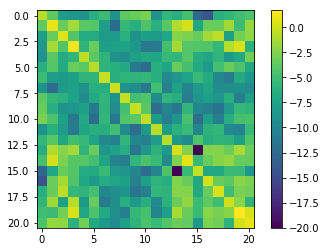

In [76]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(matrix2);
plt.colorbar()
plt.show()

In [105]:
matrix22=np.log(result22.hess_inv*result22.hess_inv)

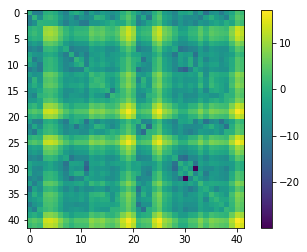

In [106]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(matrix22);
plt.colorbar()
plt.show()

In [125]:
matrix222=np.log(result222.hess_inv*result222.hess_inv)

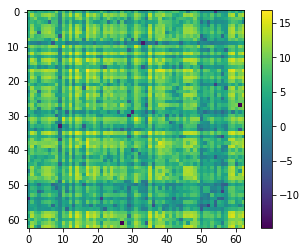

In [126]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(matrix222);
plt.colorbar()
plt.show()

In [107]:
matrix3=np.log(result3.hess_inv*result3.hess_inv)

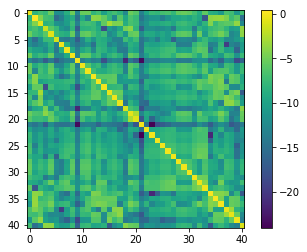

In [108]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(matrix3);
plt.colorbar()
plt.show()

In [131]:
matrix4=np.log(result4.hess_inv*result4.hess_inv)

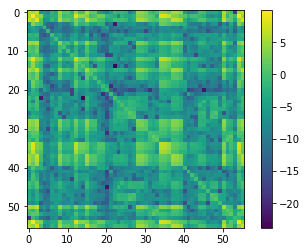

In [132]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(matrix4);
plt.colorbar()
plt.show()

In [10]:
ham.constant_subhamiltonian(0.1,ham.single_qubit_paulis(3))

array([[ 0.2+0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j],
       [ 0. +0.j,  0. +0.j,  0. +0.j, -0.2+0.j]])